# Etude statistique du dataset
Lien vers le dataset que nous avons choisi :


In [2]:
# Installation des librairies nécessaires :
! pip install pandas
! pip install matplotlib
! pip install pillow

^C


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# On a un fichier de texte parent_child_rel.txt contenant des informations les informations suivantes :
# {id du style architectural parent} {id du style architectural enfant}

# On a un autre fichier style_names.txt contenant :
# {id du style architectural} {nom du style architectural}

# On souhaite créer un dataframe contenant :
# -id du style architectural parent
# -nom du style architectural parent
# -id du style architectural enfant
# -nom du style architectural enfant

parent_child_rel = '../dataset_doc/parent_child_rel.txt'
style_names = '../dataset_doc/style_names.txt'

import pandas as pd

def get_parent_child_rel(rel_file, names_file):
    # On ouvre le fichier contenant les relations parent-enfant
    with open(rel_file, 'r') as f:
        rel = f.readlines()
    # On ouvre le fichier contenant les noms des styles architecturaux
    with open(names_file, 'r') as f:
        names = f.readlines()

    # On crée un dictionnaire contenant l'id et le nom des styles architecturaux
    names_dict = {}
    for name in names:
        name = name.split()
        names_dict[name[0]] = name[1]

    # On crée un dict contenant les relations parent-enfant
    rel_dict = {}
    for relation in rel:
        relation = relation.split()
        rel_dict[relation[0]] = relation[1]

    # On crée un dataframe contenant les relations parent-enfant avec deux colonnes : parent et child
    df = pd.DataFrame.from_dict(rel_dict, orient='index',columns=['child_id']).reset_index()
    # On renomme la colonne index en parent_id
    df = df.rename(columns={'index':'parent_id'})

    # On ajoute une colonne contenant le nom du style architectural enfant
    df['child_name'] = df['child_id'].map(names_dict)


    # On ajoute une colonne contenant le nom du style architectural parent
    df['parent_name'] = df['parent_id'].map(names_dict)

    # On réarrange les colonnes selon cet ordre : parent_id, parent_name, child_id, child_name
    df = df[['parent_id', 'parent_name', 'child_id', 'child_name']]

    # On retourne le dataframe
    return df
    


C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
# On crée un dataframe contenant les relations parent-enfant
df_rel = get_parent_child_rel(parent_child_rel, style_names)
display(df_rel.head())

,parent_id,parent_name,child_id,child_name
0,Q750752,English,Q15609295,Perpendicular
1,Q176483,Gothic,Q695863,Brick
2,Q236122,Renaissance,Q502163,Renaissance
3,Q840829,Baroque,Q21564105,Rococo
4,Q46261,Romanesque,Q744373,Romanesque


In [4]:
test_txt = '../sets/wc4_test.txt'
train_txt = '../sets/wc4_train.txt'
trainval_txt = '../sets/wc4_trainval.txt'
val_txt = '../sets/wc4_val.txt'

# Chacun des fichiers texte ci-dessus contient :
#{nom du fichier image} {id du style architectural enfant}

In [6]:
# On créé une fonction qui prend en argument un fichier texte et qui retourne un dataframe contenant :
# -le nom du fichier image
# -l'id du style architectural parent

def get_img_parent_style(txt_file):
    # On ouvre le fichier texte
    with open(txt_file, 'r') as f:
        txt = f.readlines()

    # On crée un dictionnaire contenant le nom du fichier image et l'id du style architectural enfant
    txt_dict = {}
    for line in txt:
        line = line.split()
        txt_dict[line[0]] = line[1]

    # On crée un dataframe à partir du dictionnaire
    df_in = pd.DataFrame.from_dict(txt_dict, orient='index',columns=['parent_id']).reset_index()
    # On renomme la colonne index en img_name
    df_in = df_in.rename(columns={'index':'img_name'})

    # On compare les id du style architectural parent avec ceux du dataframe contenant les relations parent-enfant et on ajoute une colonne contenant le nom du style architectural parent
    df_in['parent_name'] = df_in['parent_id'].map(df_rel.set_index('parent_id')['parent_name'])

    # On retourne le dataframe
    return df_in

In [7]:
print('train set')
df_train = get_img_parent_style(train_txt)
display(df_train.head())
display(df_train.tail())

print('train eval set')
df_trainval = get_img_parent_style(trainval_txt)
display(df_trainval.head())
display(df_train.tail())

print('eval set')
df_val = get_img_parent_style(val_txt)
display(df_val.head())
display(df_train.tail())

print('test set')
df_test = get_img_parent_style(test_txt)
display(df_test.head())
display(df_train.tail())

train set


,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


train eval set


,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


eval set


,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


test set


,img_name,parent_id,parent_name
0,Q2588857_wd0.jpg,Q840829,Baroque
1,Q626388_wd0.jpg,Q840829,Baroque
2,Q11985244_wd0.jpg,Q840829,Baroque
3,Q1561401_wd0.jpg,Q840829,Baroque
4,Q8406909_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


,style_name,count
0,Gothic,3041
1,Romanesque,1653
2,Baroque,1080
3,Renaissance,64


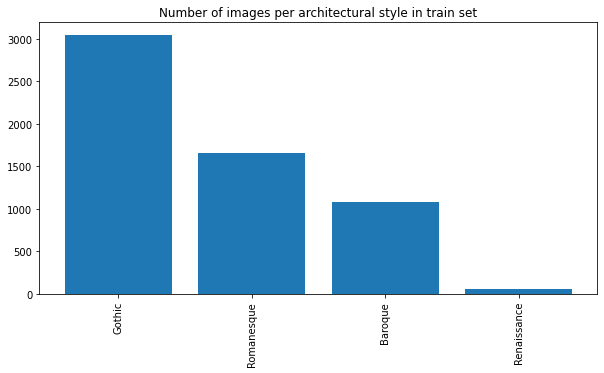

,style_name,count
0,Gothic,3093
1,Romanesque,1703
2,Baroque,1132
3,Renaissance,116


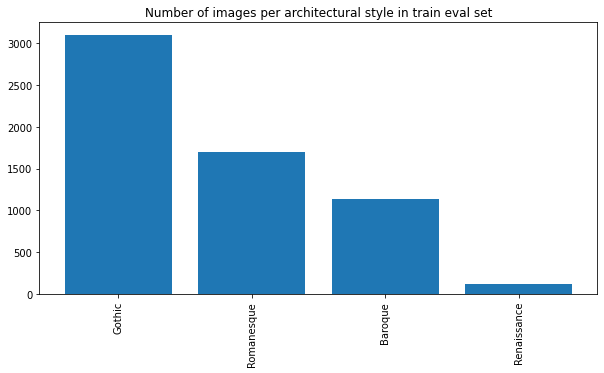

,style_name,count
0,Baroque,52
1,Renaissance,52
2,Gothic,52
3,Romanesque,50


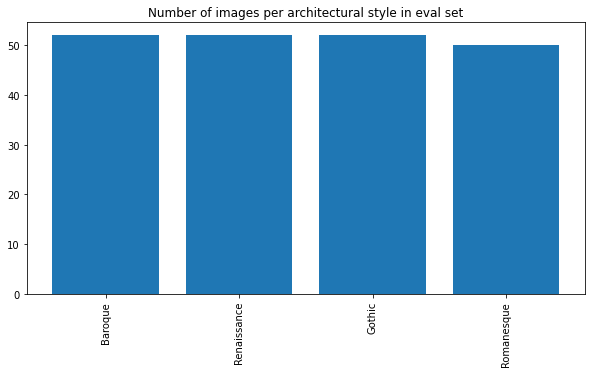

,style_name,count
0,Gothic,506
1,Romanesque,504
2,Baroque,372
3,Renaissance,100


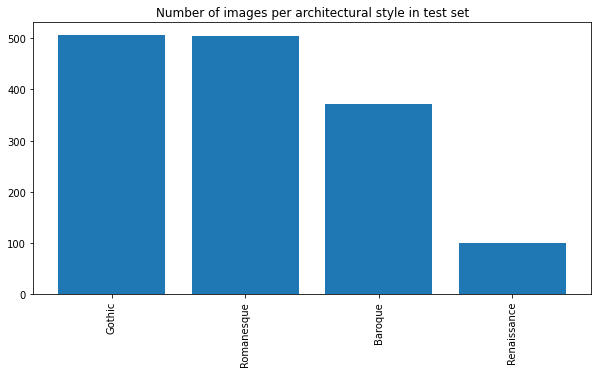

In [7]:
# On souhaite visualiser la distribution des styles architecturaux dans les différents sets
import matplotlib.pyplot as plt

# On souhaite aussi visualiser le nombre exact d'images par style architectural
def plot_style_distribution(df, set_name):
    # On crée un dictionnaire contenant le nombre d'images par style architectural
    style_count = df['parent_name'].value_counts().to_dict()

    # On crée un dataframe à partir du dictionnaire
    df_count = pd.DataFrame.from_dict(style_count, orient='index',columns=['count']).reset_index()
    # On renomme la colonne index en style_name
    df_count = df_count.rename(columns={'index':'style_name'})

    # On trie le dataframe par ordre décroissant
    df_count = df_count.sort_values(by='count', ascending=False)

    # On affiche le nombre d'images par style architectural
    display(df_count)

    # On affiche le nombre d'images par style architectural sous forme de diagramme en bâtons
    plt.figure(figsize=(10,5))
    plt.bar(df_count['style_name'], df_count['count'])
    plt.title(f'Number of images per architectural style in {set_name} set')
    plt.xticks(rotation=90)
    plt.show()

plot_style_distribution(df_train, 'train')
plot_style_distribution(df_trainval, 'train eval')
plot_style_distribution(df_val, 'eval')
plot_style_distribution(df_test, 'test')

In [8]:
# On regroupe tous les sets dans un seul dataframe
df_concat_sets = pd.concat([df_train, df_trainval, df_val, df_test])
display(df_concat_sets.head())

,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


,style_name,count
0,Gothic,6692
1,Romanesque,3910
2,Baroque,2636
3,Renaissance,332


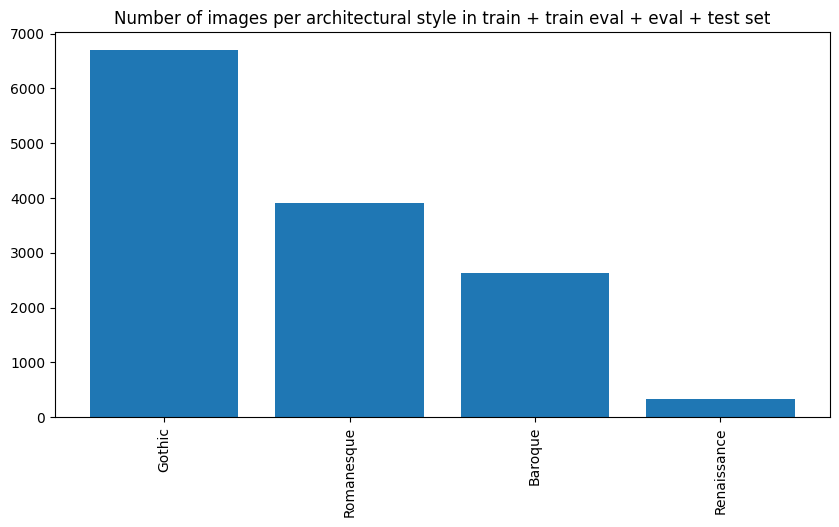

In [9]:
# On souhaite visualiser la distribution des styles architecturaux dans tous les sets
plot_style_distribution(df_concat_sets, 'train + train eval + eval + test')


In [8]:
# chemin vers le dataset :
dataset_path = '../../DATASET/'

## Compression des images

In [9]:
! pip install tqdm

^C


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Nos images sont stockées dans un dossier images/images
# Ces images pèsent bien trop lourd pour être transformées en tenseurs et être traitées par le modèle
# On va donc les réduire à une taille de 256x256 pixels
# On va aussi les normaliser en divisant les valeurs des pixels par 255

# On sauvegarde les images dans un dossier images/images_256

# On crée une fonction qui prend en argument un dataframe et qui sauvegarde les images dans un dossier images/images_256

# On souhaite aussi que la fonction aie une barre de progression
from tqdm import tqdm

import os
from PIL import Image

def save_images(df):
    # On crée un dossier images/images_256 s'il n'existe pas déjà
    if not os.path.exists(dataset_path + 'images_256'):
        os.makedirs(dataset_path + 'images_256')
    
    # On affiche la barre de progression sous forme de pourcentage sur le notebook
    pbar = tqdm(total=len(df), position=0, leave=True)




    # On parcourt le dataframe
    for index, row in df.iterrows():
        # On ouvre l'image
        img = Image.open(dataset_path + 'images/' + row['img_name'])
        # On redimensionne l'image
        img = img.resize((256,256))
        # On normalise les valeurs des pixels
        img = img.point(lambda x: x/255)
        # On sauvegarde l'image
        img.save(dataset_path + 'images_256/' + row['img_name'])
        # On met à jour la barre de progression
        pbar.update(1)

    # On ferme la barre de progression
    pbar.close()
    



In [13]:
# On sauvegarde les images du train set
#save_images(df_train)


In [14]:
# On sauvegarde les images du train eval set
#save_images(df_trainval)

In [15]:
# On sauvegarde les images du eval set
#save_images(df_val)

In [16]:
# On sauvegarde les images du test set
#save_images(df_test)

## Partie II - Implémentation de Pytorch

In [9]:
! pip install torch

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
! pip install torchvision

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# On transforme les images en tenseurs avec pytorch
import torch
from torchvision import transforms
from PIL import Image

# On crée une fonction qui prend en argument le chemin vers une image et qui retourne un tenseur
def img_to_tensor(img_path):
    # On ouvre l'image
    img = Image.open(img_path)
    # On transforme l'image en tenseur
    img_tensor = transforms.ToTensor()(img)
    # On retourne le tenseur
    return img_tensor

# On crée une fonction qui prend en argument un dataframe et qui retourne un dictionnaire contenant le nom du fichier image et le tenseur correspondant
def get_img_tensor_dict(df):
    # On crée un dictionnaire vide
    img_tensor_dict = {}
    # On parcourt le dataframe
    for index, row in df.iterrows():
        # On crée le chemin vers l'image
        img_path = dataset_path +'images_256/'+ row['img_name']
        # On transforme l'image en tenseur
        img_tensor = img_to_tensor(img_path)
        # On ajoute le nom du fichier image et le tenseur correspondant au dictionnaire
        img_tensor_dict[row['img_name']] = img_tensor
    # On retourne le dictionnaire
    return img_tensor_dict





On crée un dictionnaire contenant le nom du fichier image et le tenseur correspondant pour chaque set

In [12]:
img_tensor_dict_train = get_img_tensor_dict(df_train)

In [13]:
img_tensor_dict_trainval = get_img_tensor_dict(df_trainval)

In [14]:
img_tensor_dict_val = get_img_tensor_dict(df_val)

In [15]:
img_tensor_dict_test = get_img_tensor_dict(df_test)

In [24]:
# On visualise un exemple de tenseur
print('train set')
print('img_name :', df_val['img_name'][0])
print('img_tensor :')
display(img_tensor_dict_val[df_val['img_name'][0]])

train set
img_name : Q1415669_wd1.jpg
img_tensor :


tensor([[[0.0902, 0.0941, 0.1020,  ..., 0.2392, 0.2980, 0.3176],
         [0.0706, 0.0824, 0.1255,  ..., 0.0980, 0.1804, 0.3059],
         [0.1294, 0.0824, 0.0627,  ..., 0.1020, 0.1725, 0.3216],
         ...,
         [0.3294, 0.3686, 0.4745,  ..., 0.5255, 0.4706, 0.3333],
         [0.3961, 0.5059, 0.6000,  ..., 0.3569, 0.2588, 0.1647],
         [0.5490, 0.5608, 0.6314,  ..., 0.1804, 0.0824, 0.1255]],

        [[0.1176, 0.1216, 0.1412,  ..., 0.2353, 0.2784, 0.2980],
         [0.0980, 0.1098, 0.1647,  ..., 0.0941, 0.1686, 0.2863],
         [0.1569, 0.1098, 0.1020,  ..., 0.0980, 0.1608, 0.3098],
         ...,
         [0.3216, 0.3686, 0.4627,  ..., 0.4627, 0.3961, 0.2706],
         [0.3804, 0.4941, 0.5804,  ..., 0.3020, 0.1961, 0.1059],
         [0.5333, 0.5412, 0.6118,  ..., 0.1255, 0.0235, 0.0667]],

        [[0.1412, 0.1451, 0.1490,  ..., 0.2588, 0.3059, 0.3255],
         [0.1216, 0.1333, 0.1725,  ..., 0.1176, 0.1961, 0.3137],
         [0.1804, 0.1333, 0.1098,  ..., 0.1294, 0.1961, 0.

In [16]:
# On créé un dataset custom contenant les tenseurs des images et les labels
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, img_tensor_dict, df, label_map):
        self.img_tensor_dict = img_tensor_dict
        self.df = df
        self.label_map = label_map

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # On récupère le nom du fichier image
        img_name = self.df['img_name'][index]
        # On récupère le tenseur correspondant
        img_tensor = self.img_tensor_dict[img_name]
        # On récupère le label
        label_str = self.df['parent_id'][index]
        label = self.label_map[label_str]
        # On retourne le tenseur et le label
        return img_tensor, label
    
    

In [17]:
# On créé une fonction qui mappe les labels aux noms des styles architecturaux
def create_label_map(df):
    unique_labels = df.iloc[:, 1].unique()
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    return label_map
    

In [18]:
# On affiiche le résultat du mapping
label_map = create_label_map(df_train)
display(label_map)

{'Q840829': 0, 'Q236122': 1, 'Q176483': 2, 'Q46261': 3}

In [44]:
# On crée un dataset custom pour le train set
dataset_train = CustomDataset(img_tensor_dict_train, df_train,label_map=label_map)

# On créé le DataLoader pour le train set
from torch.utils.data import DataLoader

batch_size = 4

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

img_tensor :


tensor([[[0.2196, 0.2235, 0.2314,  ..., 0.2941, 0.2941, 0.2941],
         [0.2275, 0.2314, 0.2353,  ..., 0.2941, 0.2941, 0.2941],
         [0.2314, 0.2314, 0.2314,  ..., 0.2941, 0.2941, 0.2941],
         ...,
         [0.4588, 0.4510, 0.4549,  ..., 0.7294, 0.6471, 0.6627],
         [0.4353, 0.4275, 0.4314,  ..., 0.8078, 0.7059, 0.7686],
         [0.5020, 0.5216, 0.5098,  ..., 0.7451, 0.6549, 0.7059]],

        [[0.4235, 0.4275, 0.4353,  ..., 0.5529, 0.5529, 0.5529],
         [0.4314, 0.4353, 0.4392,  ..., 0.5529, 0.5529, 0.5529],
         [0.4471, 0.4471, 0.4471,  ..., 0.5529, 0.5529, 0.5529],
         ...,
         [0.4706, 0.4627, 0.4667,  ..., 0.7098, 0.6275, 0.6431],
         [0.4471, 0.4392, 0.4431,  ..., 0.7882, 0.6863, 0.7490],
         [0.5137, 0.5333, 0.5216,  ..., 0.7255, 0.6353, 0.6863]],

        [[0.7490, 0.7529, 0.7608,  ..., 0.8588, 0.8588, 0.8588],
         [0.7569, 0.7608, 0.7647,  ..., 0.8588, 0.8588, 0.8588],
         [0.7686, 0.7686, 0.7686,  ..., 0.8588, 0.8588, 0.

label : tensor(3)
label_str : Q46261
label_name : Romanesque


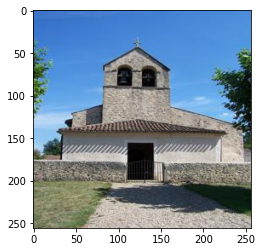

In [20]:
# On visualise la première image du train set et son label à partir du DataLoader
# On visualise le tenseur de l'image, et on reconstitue l'image à partir du tenseur
import matplotlib.pyplot as plt

for img_tensor, label in dataloader_train:
    print('img_tensor :')
    display(img_tensor[0])
    # On récupère le label
    print('label :', label[0])
    # On utilise le label_map pour récupérer le nom du style architectural
    label_str = [k for k,v in label_map.items() if v == label[0]][0]
    print('label_str :', label_str)
    # On print le nom du style architectural correspondant au label
    print('label_name :', df_train[df_train['parent_id'] == label_str]['parent_name'].values[0])
    # On reconstitue l'image à partir du tenseur
    plt.imshow(img_tensor[0].permute(1,2,0))
    break





## Partie III - Modèle personnalisé
Maintenant qu'un DataLoader a été créé avec les images et les labels correspondant, nous allons pouvoir implémenter notre premier CNN personnalisé.

In [22]:
! pip install scikit-learn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Définition d'un modèle de CNN personnalisé (2 convolutions)

In [21]:
import torch.nn as nn
import torch.nn.functional as F

# On crée un modèle de réseau de neurones convolutif
class Net(nn.Module):
    def __init__(self, num_classes = 4):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1,stride=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1,stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*64*64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)



    def forward(self, x):
        # Première couche de convolution suivie de ReLU et de max pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        # Deuxième couche de convolution suivie de ReLU et de max pooling
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        # Redimensionner l'activation pour l'entrée de la première couche entièrement connectée
        x = x.view(-1, 32 * 64 * 64)
        # Trois couches entièrement connectées avec ReLU entre chacune
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    

In [22]:
# On teste le modèle
net = Net()

### Fonction d'entrainement

In [53]:
# On créé une fonction d'entrainement du modèle
# Cette fonction possède aussi une barre de progression sous forme de pourcentage avec tqdm
# Cette barre de progression se rempli à chaque epoch

import torch.optim as optim

def train_model(model, dataloader, epochs):

    # On définit la fonction de coût
    criterion = nn.CrossEntropyLoss()

    # On définit l'optimiseur
    optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9)

    

    # On parcourt les epochs
    for epoch in range(epochs):
        loss_stats = []
       

        # On affiche l'epoch en cours
        print(f'epoch {epoch+1}/{epochs}')

        # On affiche la barre de progression sous forme de pourcentage sur le notebook
        pbar = tqdm(total=len(dataloader), position=0, leave=True)

        

        # On initialise la running_loss à 0
        running_loss = 0.0

        # On parcourt les batches du dataloader
        for i, data in enumerate(dataloader, 0):

            # On affiche la barre de progression sous forme de pourcentage sur le notebook
            pbar.update(1)

            # On récupère les tenseurs et les labels
            inputs, labels = data

            # On met les gradients à zéro
            optimizer.zero_grad()

            # On fait une prédiction
            outputs = model(inputs)

            # On calcule la fonction de coût
            loss = criterion(outputs, labels)

            # On calcule les gradients
            loss.backward()

            # On met à jour les paramètres
            optimizer.step()

            # Tous les 20 batches, on affiche :
            running_loss += loss.item()
            if i % 200 == 199:    # print every 20 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
                loss_stats.append((running_loss / 200,i,epoch))
                running_loss = 0.0

    # On ferme la barre de progression
    pbar.close()
    
    # On retourne le modèle
    return model, loss_stats





### Entrainement

In [54]:
# On entraine le modèle
train_model(net, dataloader_train, epochs=5)




epoch 1/5


  3%|▎         | 45/1460 [00:07<03:38,  6.47it/s]

KeyboardInterrupt: 

### Tests d'accuracy

In [144]:
# On crée un dataset custom pour le train eval set
dataset_trainval = CustomDataset(img_tensor_dict_trainval, df_trainval,label_map=label_map)

# On créé le DataLoader pour le train eval set
dataloader_trainval = DataLoader(dataset_trainval, batch_size=batch_size, shuffle=True)

# On teste le modèle sur le train eval set
correct = 0

# On parcourt les batches du dataloader
for i, data in enumerate(dataloader_trainval, 0):
    # On récupère les tenseurs et les labels
    inputs, labels = data
    # On fait une prédiction
    outputs = net(inputs)
    # On récupère l'indice de la valeur maximale
    _, predicted = torch.max(outputs, 1)
    # On incrémente correct de 1 si la prédiction est correcte
    correct += (predicted == labels).sum().item()

# On affiche le pourcentage de prédictions correctes
print(f'Accuracy on train eval set : {correct / len(dataset_trainval) * 100:.2f}%')



Accuracy on train eval set : 53.79%


In [145]:
# On teste le modèle sur le test set
correct = 0

# On crée un dataset custom pour le test set
dataset_test = CustomDataset(img_tensor_dict_test, df_test,label_map=label_map)

# On créé le DataLoader pour le test set
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

# On parcourt les batches du dataloader
for i, data in enumerate(dataloader_test, 0):
    # On récupère les tenseurs et les labels
    inputs, labels = data
    # On fait une prédiction
    outputs = net(inputs)
    # On récupère l'indice de la valeur maximale
    _, predicted = torch.max(outputs, 1)
    # On incrémente correct de 1 si la prédiction est correcte
    correct += (predicted == labels).sum().item()	

# On affiche le pourcentage de prédictions correctes
print(f'Accuracy on test set : {correct / len(dataset_test) * 100:.2f}%')

Accuracy on test set : 36.64%


In [36]:
import time
import copy
import glob

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Resnet18

Premier test :
- Optim : SGD
- Criterion : CrossEntropy
- Batch size : 4
- Epochs : 4

In [24]:
import torchvision.models as models

In [25]:
resnet18 = models.resnet18(pretrained=True)

C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
            
set_parameter_requires_grad(resnet18)

In [48]:
# On initialise une nouvelle couche de sortie
resnet18.fc = nn.Linear(512,4)

In [55]:
# On entraine le modèle
training_stats = train_model(resnet18, dataloader_train, epochs=4)

epoch 1/4


 14%|█▍        | 202/1460 [00:34<03:34,  5.88it/s]

[1,   200] loss: 0.914


 27%|██▋       | 401/1460 [01:07<03:10,  5.56it/s]

[1,   400] loss: 1.007


 41%|████      | 601/1460 [01:45<02:54,  4.93it/s]

[1,   600] loss: 0.973


 55%|█████▍    | 801/1460 [02:29<02:11,  5.02it/s]

[1,   800] loss: 0.963


 69%|██████▊   | 1001/1460 [03:08<01:39,  4.60it/s]

[1,  1000] loss: 0.992


 82%|████████▏ | 1201/1460 [03:50<00:55,  4.69it/s]

[1,  1200] loss: 1.010


 96%|█████████▌| 1401/1460 [04:34<00:11,  5.10it/s]

[1,  1400] loss: 0.982


100%|██████████| 1460/1460 [04:45<00:00,  4.75it/s]

epoch 2/4


 14%|█▍        | 201/1460 [00:41<03:47,  5.54it/s]

[2,   200] loss: 1.068


 27%|██▋       | 401/1460 [01:23<03:32,  4.99it/s]

[2,   400] loss: 1.055


 41%|████      | 601/1460 [02:02<03:01,  4.73it/s]

[2,   600] loss: 1.132


 55%|█████▍    | 801/1460 [02:43<02:01,  5.41it/s]

[2,   800] loss: 0.959


 69%|██████▊   | 1001/1460 [03:25<01:43,  4.43it/s]

[2,  1000] loss: 1.074


 82%|████████▏ | 1202/1460 [04:04<00:50,  5.14it/s]

[2,  1200] loss: 0.998


 96%|█████████▌| 1401/1460 [04:46<00:11,  5.30it/s]

[2,  1400] loss: 1.053


100%|██████████| 1460/1460 [04:58<00:00,  4.97it/s]

epoch 3/4


 14%|█▍        | 202/1460 [00:42<04:02,  5.18it/s]

[3,   200] loss: 0.913


 28%|██▊       | 402/1460 [01:24<03:34,  4.94it/s]

[3,   400] loss: 0.937


 41%|████      | 601/1460 [02:04<03:03,  4.67it/s]

[3,   600] loss: 0.991


 55%|█████▍    | 801/1460 [02:45<02:22,  4.64it/s]

[3,   800] loss: 1.001


 69%|██████▊   | 1002/1460 [03:26<01:26,  5.31it/s]

[3,  1000] loss: 0.957


 82%|████████▏ | 1201/1460 [04:09<00:53,  4.81it/s]

[3,  1200] loss: 1.049


 96%|█████████▌| 1401/1460 [04:48<00:12,  4.81it/s]

[3,  1400] loss: 1.113


100%|██████████| 1460/1460 [05:02<00:00,  4.54it/s]

epoch 4/4


 14%|█▍        | 201/1460 [00:39<04:00,  5.23it/s]

[4,   200] loss: 0.962


 28%|██▊       | 402/1460 [01:20<03:08,  5.62it/s]

[4,   400] loss: 0.971


 41%|████      | 601/1460 [02:00<03:04,  4.66it/s]

[4,   600] loss: 1.050


 55%|█████▍    | 801/1460 [02:40<02:08,  5.11it/s]

[4,   800] loss: 0.997


 69%|██████▊   | 1001/1460 [03:21<01:30,  5.05it/s]

[4,  1000] loss: 1.005


 82%|████████▏ | 1201/1460 [04:03<00:47,  5.44it/s]

[4,  1200] loss: 1.009


 96%|█████████▌| 1401/1460 [04:45<00:13,  4.28it/s]

[4,  1400] loss: 0.977


100%|██████████| 1460/1460 [04:57<00:00,  4.90it/s]


  0%|          | 1/1460 [1:15:27<1834:44:45, 4527.13s/it]


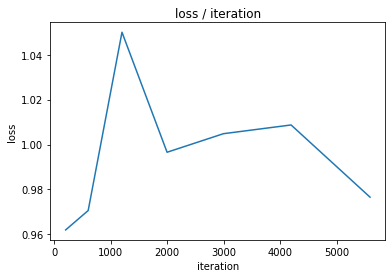

In [56]:
# On utilise training_stats pour afficher la courbe d'apprentissage
import matplotlib.pyplot as plt

model,loss_stats = training_stats

# On affiche la courbe d'apprentissage avec loss / batch

loss,iteration,epoch = zip(*loss_stats)

# Pour chaque i on ajoute les i précédents
new_i = [sum(iteration[:i+1]) for i in range(len(iteration))]

plt.plot(new_i,loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss / iteration')
plt.show()


# On créé un répertoire model + date et heure
import os
from datetime import datetime

# On récupère la date et l'heure
now = datetime.now()

# On créé le répertoire
os.mkdir('model_' + now.strftime("%d_%m_%Y_%H_%M_%S"))

# On sauvegarde le modèle
torch.save(model.state_dict(), 'model_' + now.strftime("%d_%m_%Y_%H_%M_%S") + '/model.pth')

# On sauvegarde loss et iteration dans un fichier csv
df = pd.DataFrame({'loss':loss,'iteration':new_i})

# On sauvegarde le dataframe dans un fichier csv
df.to_csv('model_' + now.strftime("%d_%m_%Y_%H_%M_%S") + '/loss.csv', index=False)

In [57]:
# On crée un dataset custom pour le train eval set
dataset_trainval = CustomDataset(img_tensor_dict_trainval, df_trainval,label_map=label_map)

# On créé le DataLoader pour le train eval set
dataloader_trainval = DataLoader(dataset_trainval, batch_size=batch_size, shuffle=True)


# On teste le modèle sur le test set
correct = 0

# On parcourt les batches du dataloader
for i, data in enumerate(dataloader_trainval, 0):
    # On récupère les tenseurs et les labels
    inputs, labels = data
    # On fait une prédiction
    outputs = resnet18(inputs)
    # On récupère l'indice de la valeur maximale
    _, predicted = torch.max(outputs, 1)
    # On incrémente correct de 1 si la prédiction est correcte
    correct += (predicted == labels).sum().item()

# On affiche le pourcentage de prédictions correctes
print(f'Accuracy on train eval set : {correct / len(dataset_trainval) * 100:.2f}%')

Accuracy on train eval set : 60.75%


Deuxième test :
- Optim : Adam
- Criterion : CrossEntropy
- Batch size : 4
- Epochs : 4

In [58]:
# On créé une fonction d'entrainement du modèle
# Cette fonction possède aussi une barre de progression sous forme de pourcentage avec tqdm
# Cette barre de progression se rempli à chaque epoch

import torch.optim as optim

def train_model(model, dataloader, epochs):

    # On définit la fonction de coût
    criterion = nn.CrossEntropyLoss()

    # On définit l'optimiseur
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    

    # On parcourt les epochs
    for epoch in range(epochs):
        loss_stats = []
       

        # On affiche l'epoch en cours
        print(f'epoch {epoch+1}/{epochs}')

        # On affiche la barre de progression sous forme de pourcentage sur le notebook
        pbar = tqdm(total=len(dataloader), position=0, leave=True)

        

        # On initialise la running_loss à 0
        running_loss = 0.0

        # On parcourt les batches du dataloader
        for i, data in enumerate(dataloader, 0):

            # On affiche la barre de progression sous forme de pourcentage sur le notebook
            pbar.update(1)

            # On récupère les tenseurs et les labels
            inputs, labels = data

            # On met les gradients à zéro
            optimizer.zero_grad()

            # On fait une prédiction
            outputs = model(inputs)

            # On calcule la fonction de coût
            loss = criterion(outputs, labels)

            # On calcule les gradients
            loss.backward()

            # On met à jour les paramètres
            optimizer.step()

            # Tous les 20 batches, on affiche :
            running_loss += loss.item()
            if i % 200 == 199:    # print every 20 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
                loss_stats.append((running_loss / 200,i,epoch))
                running_loss = 0.0

    # On ferme la barre de progression
    pbar.close()
    
    # On retourne le modèle
    return model, loss_stats





In [59]:
# On entraine le modèle
training_stats = train_model(resnet18, dataloader_train, epochs=4)

epoch 1/4


 14%|█▍        | 201/1460 [00:37<04:08,  5.06it/s]

[1,   200] loss: 0.921


 27%|██▋       | 401/1460 [01:17<03:29,  5.06it/s]

[1,   400] loss: 0.873


 41%|████      | 601/1460 [02:02<03:36,  3.97it/s]

[1,   600] loss: 0.918


 55%|█████▍    | 801/1460 [02:50<02:13,  4.93it/s]

[1,   800] loss: 0.928


 69%|██████▊   | 1001/1460 [03:36<01:49,  4.17it/s]

[1,  1000] loss: 0.837


 82%|████████▏ | 1201/1460 [04:20<00:58,  4.40it/s]

[1,  1200] loss: 0.888


 96%|█████████▌| 1401/1460 [05:06<00:12,  4.70it/s]

[1,  1400] loss: 0.910


100%|██████████| 1460/1460 [05:19<00:00,  4.28it/s]

epoch 2/4


 14%|█▍        | 202/1460 [00:44<04:24,  4.76it/s]

[2,   200] loss: 0.833


 27%|██▋       | 401/1460 [01:28<03:48,  4.64it/s]

[2,   400] loss: 0.895


 41%|████      | 602/1460 [02:12<02:52,  4.98it/s]

[2,   600] loss: 0.882


 55%|█████▍    | 802/1460 [02:57<02:23,  4.60it/s]

[2,   800] loss: 0.911


 69%|██████▊   | 1001/1460 [03:40<01:49,  4.18it/s]

[2,  1000] loss: 0.909


 82%|████████▏ | 1201/1460 [04:24<00:56,  4.62it/s]

[2,  1200] loss: 0.816


 96%|█████████▌| 1401/1460 [05:08<00:12,  4.88it/s]

[2,  1400] loss: 0.873


100%|██████████| 1460/1460 [05:20<00:00,  4.57it/s]

epoch 3/4


 14%|█▍        | 201/1460 [00:44<04:09,  5.05it/s]

[3,   200] loss: 0.881


 27%|██▋       | 401/1460 [01:28<03:50,  4.60it/s]

[3,   400] loss: 0.887


 41%|████      | 601/1460 [02:11<02:57,  4.84it/s]

[3,   600] loss: 0.837


 55%|█████▍    | 802/1460 [02:54<02:15,  4.86it/s]

[3,   800] loss: 0.917


 69%|██████▊   | 1001/1460 [03:40<01:38,  4.64it/s]

[3,  1000] loss: 0.906


 82%|████████▏ | 1201/1460 [04:24<01:08,  3.78it/s]

[3,  1200] loss: 0.890


 96%|█████████▌| 1401/1460 [05:15<00:14,  4.09it/s]

[3,  1400] loss: 0.877


100%|██████████| 1460/1460 [05:30<00:00,  3.73it/s]

epoch 4/4


 14%|█▍        | 201/1460 [00:47<04:58,  4.21it/s]

[4,   200] loss: 0.886


 27%|██▋       | 401/1460 [01:34<03:54,  4.51it/s]

[4,   400] loss: 0.836


 41%|████      | 601/1460 [02:21<03:07,  4.58it/s]

[4,   600] loss: 0.881


 55%|█████▍    | 801/1460 [03:08<02:22,  4.62it/s]

[4,   800] loss: 0.865


 69%|██████▊   | 1001/1460 [03:56<01:48,  4.22it/s]

[4,  1000] loss: 0.906


 82%|████████▏ | 1201/1460 [04:43<01:02,  4.13it/s]

[4,  1200] loss: 0.850


 96%|█████████▌| 1401/1460 [05:28<00:13,  4.45it/s]

[4,  1400] loss: 0.873


100%|██████████| 1460/1460 [05:43<00:00,  4.26it/s]


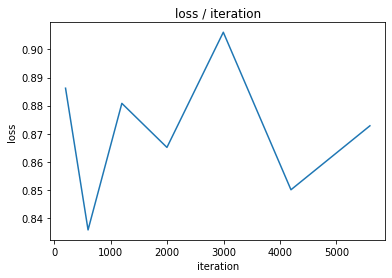

In [60]:
# On utilise training_stats pour afficher la courbe d'apprentissage
import matplotlib.pyplot as plt

model,loss_stats = training_stats

# On affiche la courbe d'apprentissage avec loss / batch

loss,iteration,epoch = zip(*loss_stats)

# Pour chaque i on ajoute les i précédents
new_i = [sum(iteration[:i+1]) for i in range(len(iteration))]

plt.plot(new_i,loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss / iteration')
plt.show()


# On créé un répertoire model + date et heure
import os
from datetime import datetime

# On récupère la date et l'heure
now = datetime.now()

# On créé le répertoire
os.mkdir('model_' + now.strftime("%d_%m_%Y_%H_%M_%S"))

# On sauvegarde le modèle
torch.save(model.state_dict(), 'model_' + now.strftime("%d_%m_%Y_%H_%M_%S") + '/model.pth')

# On sauvegarde loss et iteration dans un fichier csv
df = pd.DataFrame({'loss':loss,'iteration':new_i})

# On sauvegarde le dataframe dans un fichier csv
df.to_csv('model_' + now.strftime("%d_%m_%Y_%H_%M_%S") + '/loss.csv', index=False)

In [61]:
# On crée un dataset custom pour le train eval set
dataset_trainval = CustomDataset(img_tensor_dict_trainval, df_trainval,label_map=label_map)

# On créé le DataLoader pour le train eval set
dataloader_trainval = DataLoader(dataset_trainval, batch_size=batch_size, shuffle=True)


# On teste le modèle sur le test set
correct = 0

# On parcourt les batches du dataloader
for i, data in enumerate(dataloader_trainval, 0):
    # On récupère les tenseurs et les labels
    inputs, labels = data
    # On fait une prédiction
    outputs = resnet18(inputs)
    # On récupère l'indice de la valeur maximale
    _, predicted = torch.max(outputs, 1)
    # On incrémente correct de 1 si la prédiction est correcte
    correct += (predicted == labels).sum().item()

# On affiche le pourcentage de prédictions correctes
print(f'Accuracy on train eval set : {correct / len(dataset_trainval) * 100:.2f}%')

Accuracy on train eval set : 62.82%


Troisième test :
- Optim : Adam
- Criterion : CrossEntropy
- Batch size : 20
- Epochs : 4

In [62]:
batch_size = 4

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

In [63]:
# On entraine le modèle
training_stats = train_model(resnet18, dataloader_train, epochs=4)

epoch 1/4


 14%|█▍        | 202/1460 [00:34<03:21,  6.25it/s]

[1,   200] loss: 0.849


 28%|██▊       | 402/1460 [01:07<02:49,  6.23it/s]

[1,   400] loss: 0.915


 41%|████      | 601/1460 [01:41<02:30,  5.69it/s]

[1,   600] loss: 0.854


 55%|█████▍    | 801/1460 [02:19<02:06,  5.22it/s]

[1,   800] loss: 0.858


 69%|██████▊   | 1001/1460 [02:59<01:32,  4.94it/s]

[1,  1000] loss: 0.939


 82%|████████▏ | 1201/1460 [03:40<00:53,  4.86it/s]

[1,  1200] loss: 0.831


 96%|█████████▌| 1401/1460 [04:23<00:13,  4.52it/s]

[1,  1400] loss: 0.934


100%|██████████| 1460/1460 [04:36<00:00,  4.67it/s]

epoch 2/4


 14%|█▍        | 201/1460 [00:41<04:21,  4.82it/s]

[2,   200] loss: 0.901


 27%|██▋       | 401/1460 [01:23<03:35,  4.92it/s]

[2,   400] loss: 0.867


 41%|████      | 601/1460 [02:05<02:56,  4.88it/s]

[2,   600] loss: 0.916


 55%|█████▍    | 801/1460 [02:48<02:26,  4.49it/s]

[2,   800] loss: 0.906


 69%|██████▊   | 1001/1460 [03:29<01:35,  4.82it/s]

[2,  1000] loss: 0.869


 82%|████████▏ | 1202/1460 [04:12<00:51,  5.04it/s]

[2,  1200] loss: 0.873


 96%|█████████▌| 1401/1460 [04:55<00:13,  4.51it/s]

[2,  1400] loss: 0.906


100%|██████████| 1460/1460 [05:07<00:00,  4.99it/s]

epoch 3/4


 14%|█▍        | 201/1460 [00:42<05:08,  4.08it/s]

[3,   200] loss: 0.843


 27%|██▋       | 401/1460 [01:25<03:36,  4.88it/s]

[3,   400] loss: 0.943


 41%|████      | 601/1460 [02:11<02:48,  5.11it/s]

[3,   600] loss: 0.822


 55%|█████▍    | 801/1460 [02:57<02:26,  4.49it/s]

[3,   800] loss: 0.929


 69%|██████▊   | 1001/1460 [03:39<01:45,  4.37it/s]

[3,  1000] loss: 0.845


 82%|████████▏ | 1202/1460 [04:22<00:56,  4.58it/s]

[3,  1200] loss: 0.859


 96%|█████████▌| 1401/1460 [05:09<00:19,  3.08it/s]

[3,  1400] loss: 0.942


100%|██████████| 1460/1460 [05:25<00:00,  3.15it/s]

epoch 4/4


 14%|█▍        | 201/1460 [00:44<04:46,  4.39it/s]

[4,   200] loss: 0.914


 27%|██▋       | 401/1460 [01:28<03:25,  5.16it/s]

[4,   400] loss: 0.866


 41%|████      | 602/1460 [02:17<02:54,  4.92it/s]

[4,   600] loss: 0.900


 55%|█████▍    | 801/1460 [03:03<02:47,  3.92it/s]

[4,   800] loss: 0.917


 69%|██████▊   | 1001/1460 [03:45<01:43,  4.45it/s]

[4,  1000] loss: 0.881


 82%|████████▏ | 1201/1460 [04:26<00:47,  5.42it/s]

[4,  1200] loss: 0.874


 96%|█████████▌| 1401/1460 [05:09<00:12,  4.85it/s]

[4,  1400] loss: 0.867


100%|██████████| 1460/1460 [05:21<00:00,  4.54it/s]


In [64]:
# On crée un dataset custom pour le train eval set
dataset_trainval = CustomDataset(img_tensor_dict_trainval, df_trainval,label_map=label_map)

# On créé le DataLoader pour le train eval set
dataloader_trainval = DataLoader(dataset_trainval, batch_size=batch_size, shuffle=True)


# On teste le modèle sur le test set
correct = 0

# On parcourt les batches du dataloader
for i, data in enumerate(dataloader_trainval, 0):
    # On récupère les tenseurs et les labels
    inputs, labels = data
    # On fait une prédiction
    outputs = resnet18(inputs)
    # On récupère l'indice de la valeur maximale
    _, predicted = torch.max(outputs, 1)
    # On incrémente correct de 1 si la prédiction est correcte
    correct += (predicted == labels).sum().item()

# On affiche le pourcentage de prédictions correctes
print(f'Accuracy on train eval set : {correct / len(dataset_trainval) * 100:.2f}%')

Accuracy on train eval set : 59.33%
